In [ ]:
#loadingt the libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
cb=ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',save_best_only=True)

Epoch 1/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2766 - loss: 2.6628

625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.3643 - loss: 1.9089 - val_accuracy: 0.4704 - val_loss: 1.4871
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5066 - loss: 1.3915

625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.5145 - loss: 1.3664 - val_accuracy: 0.5212 - val_loss: 1.3670
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5795 - loss: 1.1921

625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.5797 - loss: 1.1906 - val_accuracy: 0.5713 - val_loss: 1.2273
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6289 - loss: 1.0532

625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6311 - loss: 1.0530 - val_accuracy: 0.5821 - val_loss: 1.2162
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6827 - loss: 0.9113

625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6765 - loss: 0.9260 - val_accuracy: 0.5896 - val_loss: 1.1936
Epoch 6/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7260 - loss: 0.7944

625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7189 - loss: 0.8064 - val_accuracy: 0.6062 - val_loss: 1.1678
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.7659 - loss: 0.6764 - val_accuracy: 0.6130 - val_loss: 1.1897
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8099 - loss: 0.5514 - val_accuracy: 0.6274 - val_loss: 1.2146
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.8527 - loss: 0.4370 - val_accuracy: 0.6231 - val_loss: 1.2498
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8944 - loss: 0.3241 - val_accuracy: 0.6311 - val_loss: 1.3315
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9226 - loss: 0.2406 - val_accuracy: 0.6222 - val_loss: 1.5219
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.9403 - loss: 0.1861 - val_accuracy: 0.6222 - val_loss: 1.6086
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9579 - loss: 0.1355 - val_acc

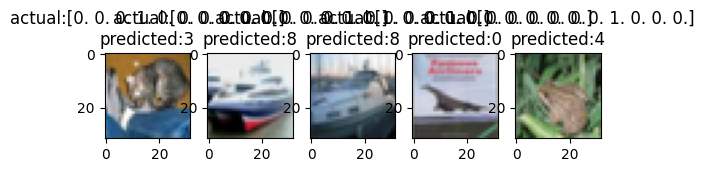

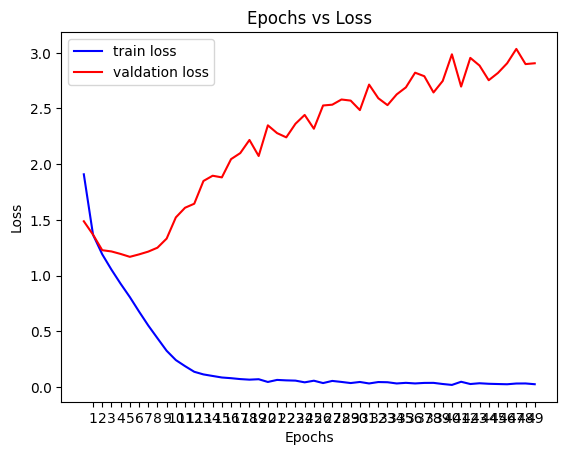

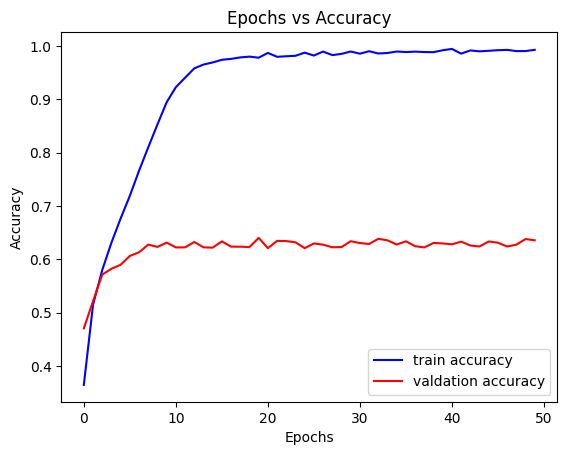

In [ ]:
result=model.fit(x_train,y_train_cat,epochs=50,batch_size=64,validation_split=0.2,callbacks=[cb])
loss,test_accuracy=model.evaluate(x_test,y_test_cat)

predictions=model.predict(x_test)
predict_label=np.argmax(predictions,axis=1)
print(f"predicted label:{predict_label[1]}")

#Print the predicted image
for i in range(5):
    #print(f"actual:{y_test[i]}\npredicted:{predict_label[i]}")
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"actual:{y_test_cat[i]}\npredicted:{predict_label[i]}")
plt.show()
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
plt.xticks(np.arange(1,50))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()